# Ghazaleh Zehtab
# HW6, Question1

In [181]:
import jenkspy

import pandas as pd
import statsmodels.api as sm
from sklearn import datasets
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
from scipy.cluster.hierarchy import fcluster
import matplotlib.cm as cm
import plot_utils
import seaborn as sns
import statistics
from sklearn import tree, metrics, preprocessing
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, silhouette_score, silhouette_samples
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression

## a

In [182]:
df=pd.read_csv('Camera.csv',sep=';')
df

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
0,Agfa ePhoto 1280,1997,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0
1,Agfa ePhoto 1680,1998,1280.0,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.0,158.0,179.0
2,Agfa ePhoto CL18,2000,640.0,0.0,0.0,45.0,45.0,0.0,0.0,2.0,0.0,0.0,179.0
3,Agfa ePhoto CL30,1999,1152.0,640.0,0.0,35.0,35.0,0.0,0.0,4.0,0.0,0.0,269.0
4,Agfa ePhoto CL30 Clik!,1999,1152.0,640.0,0.0,43.0,43.0,50.0,0.0,40.0,300.0,128.0,1299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,Toshiba PDR-M65,2001,2048.0,1024.0,3.0,38.0,114.0,10.0,10.0,8.0,320.0,120.0,62.0
1034,Toshiba PDR-M70,2000,2048.0,1024.0,3.0,35.0,105.0,80.0,9.0,16.0,390.0,116.0,62.0
1035,Toshiba PDR-M71,2001,2048.0,1024.0,3.0,35.0,98.0,80.0,10.0,8.0,340.0,107.0,62.0
1036,Toshiba PDR-M81,2001,2400.0,1200.0,3.0,35.0,98.0,80.0,10.0,16.0,340.0,107.0,62.0


## b

In [183]:
df[df.isna().any(axis=1)]

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
345,HP Photosmart R927,2006,3296.0,2592.0,8.0,35.0,105.0,50.0,10.0,NaN,NaN,NaN,179.0
346,HP Photosmart R937,2007,3298.0,0.0,8.0,39.0,118.0,50.0,NaN,NaN,NaN,NaN,179.0


In [184]:
df.dropna(inplace=True)
df

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
0,Agfa ePhoto 1280,1997,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0
1,Agfa ePhoto 1680,1998,1280.0,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.0,158.0,179.0
2,Agfa ePhoto CL18,2000,640.0,0.0,0.0,45.0,45.0,0.0,0.0,2.0,0.0,0.0,179.0
3,Agfa ePhoto CL30,1999,1152.0,640.0,0.0,35.0,35.0,0.0,0.0,4.0,0.0,0.0,269.0
4,Agfa ePhoto CL30 Clik!,1999,1152.0,640.0,0.0,43.0,43.0,50.0,0.0,40.0,300.0,128.0,1299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,Toshiba PDR-M65,2001,2048.0,1024.0,3.0,38.0,114.0,10.0,10.0,8.0,320.0,120.0,62.0
1034,Toshiba PDR-M70,2000,2048.0,1024.0,3.0,35.0,105.0,80.0,9.0,16.0,390.0,116.0,62.0
1035,Toshiba PDR-M71,2001,2048.0,1024.0,3.0,35.0,98.0,80.0,10.0,8.0,340.0,107.0,62.0
1036,Toshiba PDR-M81,2001,2400.0,1200.0,3.0,35.0,98.0,80.0,10.0,16.0,340.0,107.0,62.0


In [185]:
df.dtypes

Model                       object
Release date                 int64
Max resolution             float64
Low resolution             float64
Effective pixels           float64
Zoom wide (W)              float64
Zoom tele (T)              float64
Normal focus range         float64
Macro focus range          float64
Storage included           float64
Weight (inc. batteries)    float64
Dimensions                 float64
Price                      float64
dtype: object

In [186]:
df.replace(0.0,df.mode().iloc[0],inplace=True)
df.head()

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
0,Agfa ePhoto 1280,1997,1024.0,640.0,3.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0
1,Agfa ePhoto 1680,1998,1280.0,640.0,1.0,38.0,114.0,50.0,10.0,4.0,420.0,158.0,179.0
2,Agfa ePhoto CL18,2000,640.0,2048.0,3.0,45.0,45.0,50.0,10.0,2.0,320.0,90.0,179.0
3,Agfa ePhoto CL30,1999,1152.0,640.0,3.0,35.0,35.0,50.0,10.0,4.0,320.0,90.0,269.0
4,Agfa ePhoto CL30 Clik!,1999,1152.0,640.0,3.0,43.0,43.0,50.0,10.0,40.0,300.0,128.0,1299.0


In [187]:
df['Model'].value_counts() 

Olympus C-740 UZ            1
Panasonic Lumix DMC-FX30    1
Canon PowerShot A610        1
Canon PowerShot SD400       1
Olympus SP-560 UZ           1
                           ..
Samsung Digimax 370         1
Kyocera Finecam L30         1
Sony DSC-V3                 1
Olympus Stylus 300          1
Panasonic Lumix DMC-LZ3     1
Name: Model, Length: 1036, dtype: int64

In [188]:
df['Model'] = df['Model'].astype('category')
df.dtypes

Model                      category
Release date                  int64
Max resolution              float64
Low resolution              float64
Effective pixels            float64
Zoom wide (W)               float64
Zoom tele (T)               float64
Normal focus range          float64
Macro focus range           float64
Storage included            float64
Weight (inc. batteries)     float64
Dimensions                  float64
Price                       float64
dtype: object

In [189]:
df['Model'] = df['Model'].cat.codes
df.head()

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
0,0,1997,1024.0,640.0,3.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0
1,1,1998,1280.0,640.0,1.0,38.0,114.0,50.0,10.0,4.0,420.0,158.0,179.0
2,2,2000,640.0,2048.0,3.0,45.0,45.0,50.0,10.0,2.0,320.0,90.0,179.0
3,3,1999,1152.0,640.0,3.0,35.0,35.0,50.0,10.0,4.0,320.0,90.0,269.0
4,4,1999,1152.0,640.0,3.0,43.0,43.0,50.0,10.0,40.0,300.0,128.0,1299.0


In [190]:
x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled,index=df.index, columns=df.columns)
df

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
0,0.000000,0.230769,0.100313,0.068493,0.1,0.517241,0.175510,0.579832,0.464286,0.006682,0.181818,0.309524,0.020664
1,0.000966,0.307692,0.150470,0.068493,0.0,0.517241,0.175510,0.411765,0.107143,0.006682,0.181818,0.609524,0.020664
2,0.001932,0.461538,0.025078,0.369863,0.1,0.758621,0.034694,0.411765,0.107143,0.002227,0.125000,0.285714,0.020664
3,0.002899,0.384615,0.125392,0.068493,0.1,0.413793,0.014286,0.411765,0.107143,0.006682,0.125000,0.285714,0.031935
4,0.003865,0.384615,0.125392,0.068493,0.1,0.689655,0.030612,0.411765,0.107143,0.086860,0.113636,0.466667,0.160927
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,0.996135,0.538462,0.300940,0.150685,0.1,0.517241,0.175510,0.075630,0.107143,0.015590,0.125000,0.428571,0.006011
1034,0.997101,0.461538,0.300940,0.150685,0.1,0.413793,0.157143,0.663866,0.095238,0.033408,0.164773,0.409524,0.006011
1035,0.998068,0.538462,0.300940,0.150685,0.1,0.413793,0.142857,0.663866,0.107143,0.015590,0.136364,0.366667,0.006011
1036,0.999034,0.538462,0.369906,0.188356,0.1,0.413793,0.142857,0.663866,0.107143,0.033408,0.136364,0.366667,0.006011


## c

array([[<AxesSubplot:title={'center':'Model'}>,
        <AxesSubplot:title={'center':'Release date'}>,
        <AxesSubplot:title={'center':'Max resolution'}>,
        <AxesSubplot:title={'center':'Low resolution'}>],
       [<AxesSubplot:title={'center':'Effective pixels'}>,
        <AxesSubplot:title={'center':'Zoom wide (W)'}>,
        <AxesSubplot:title={'center':'Zoom tele (T)'}>,
        <AxesSubplot:title={'center':'Normal focus range'}>],
       [<AxesSubplot:title={'center':'Macro focus range'}>,
        <AxesSubplot:title={'center':'Storage included'}>,
        <AxesSubplot:title={'center':'Weight (inc. batteries)'}>,
        <AxesSubplot:title={'center':'Dimensions'}>],
       [<AxesSubplot:title={'center':'Price'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

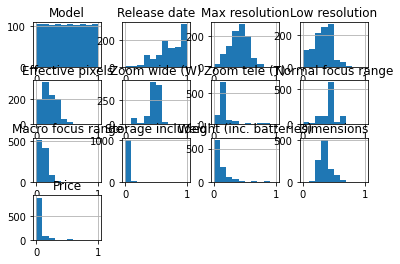

In [191]:
df.hist()

## d

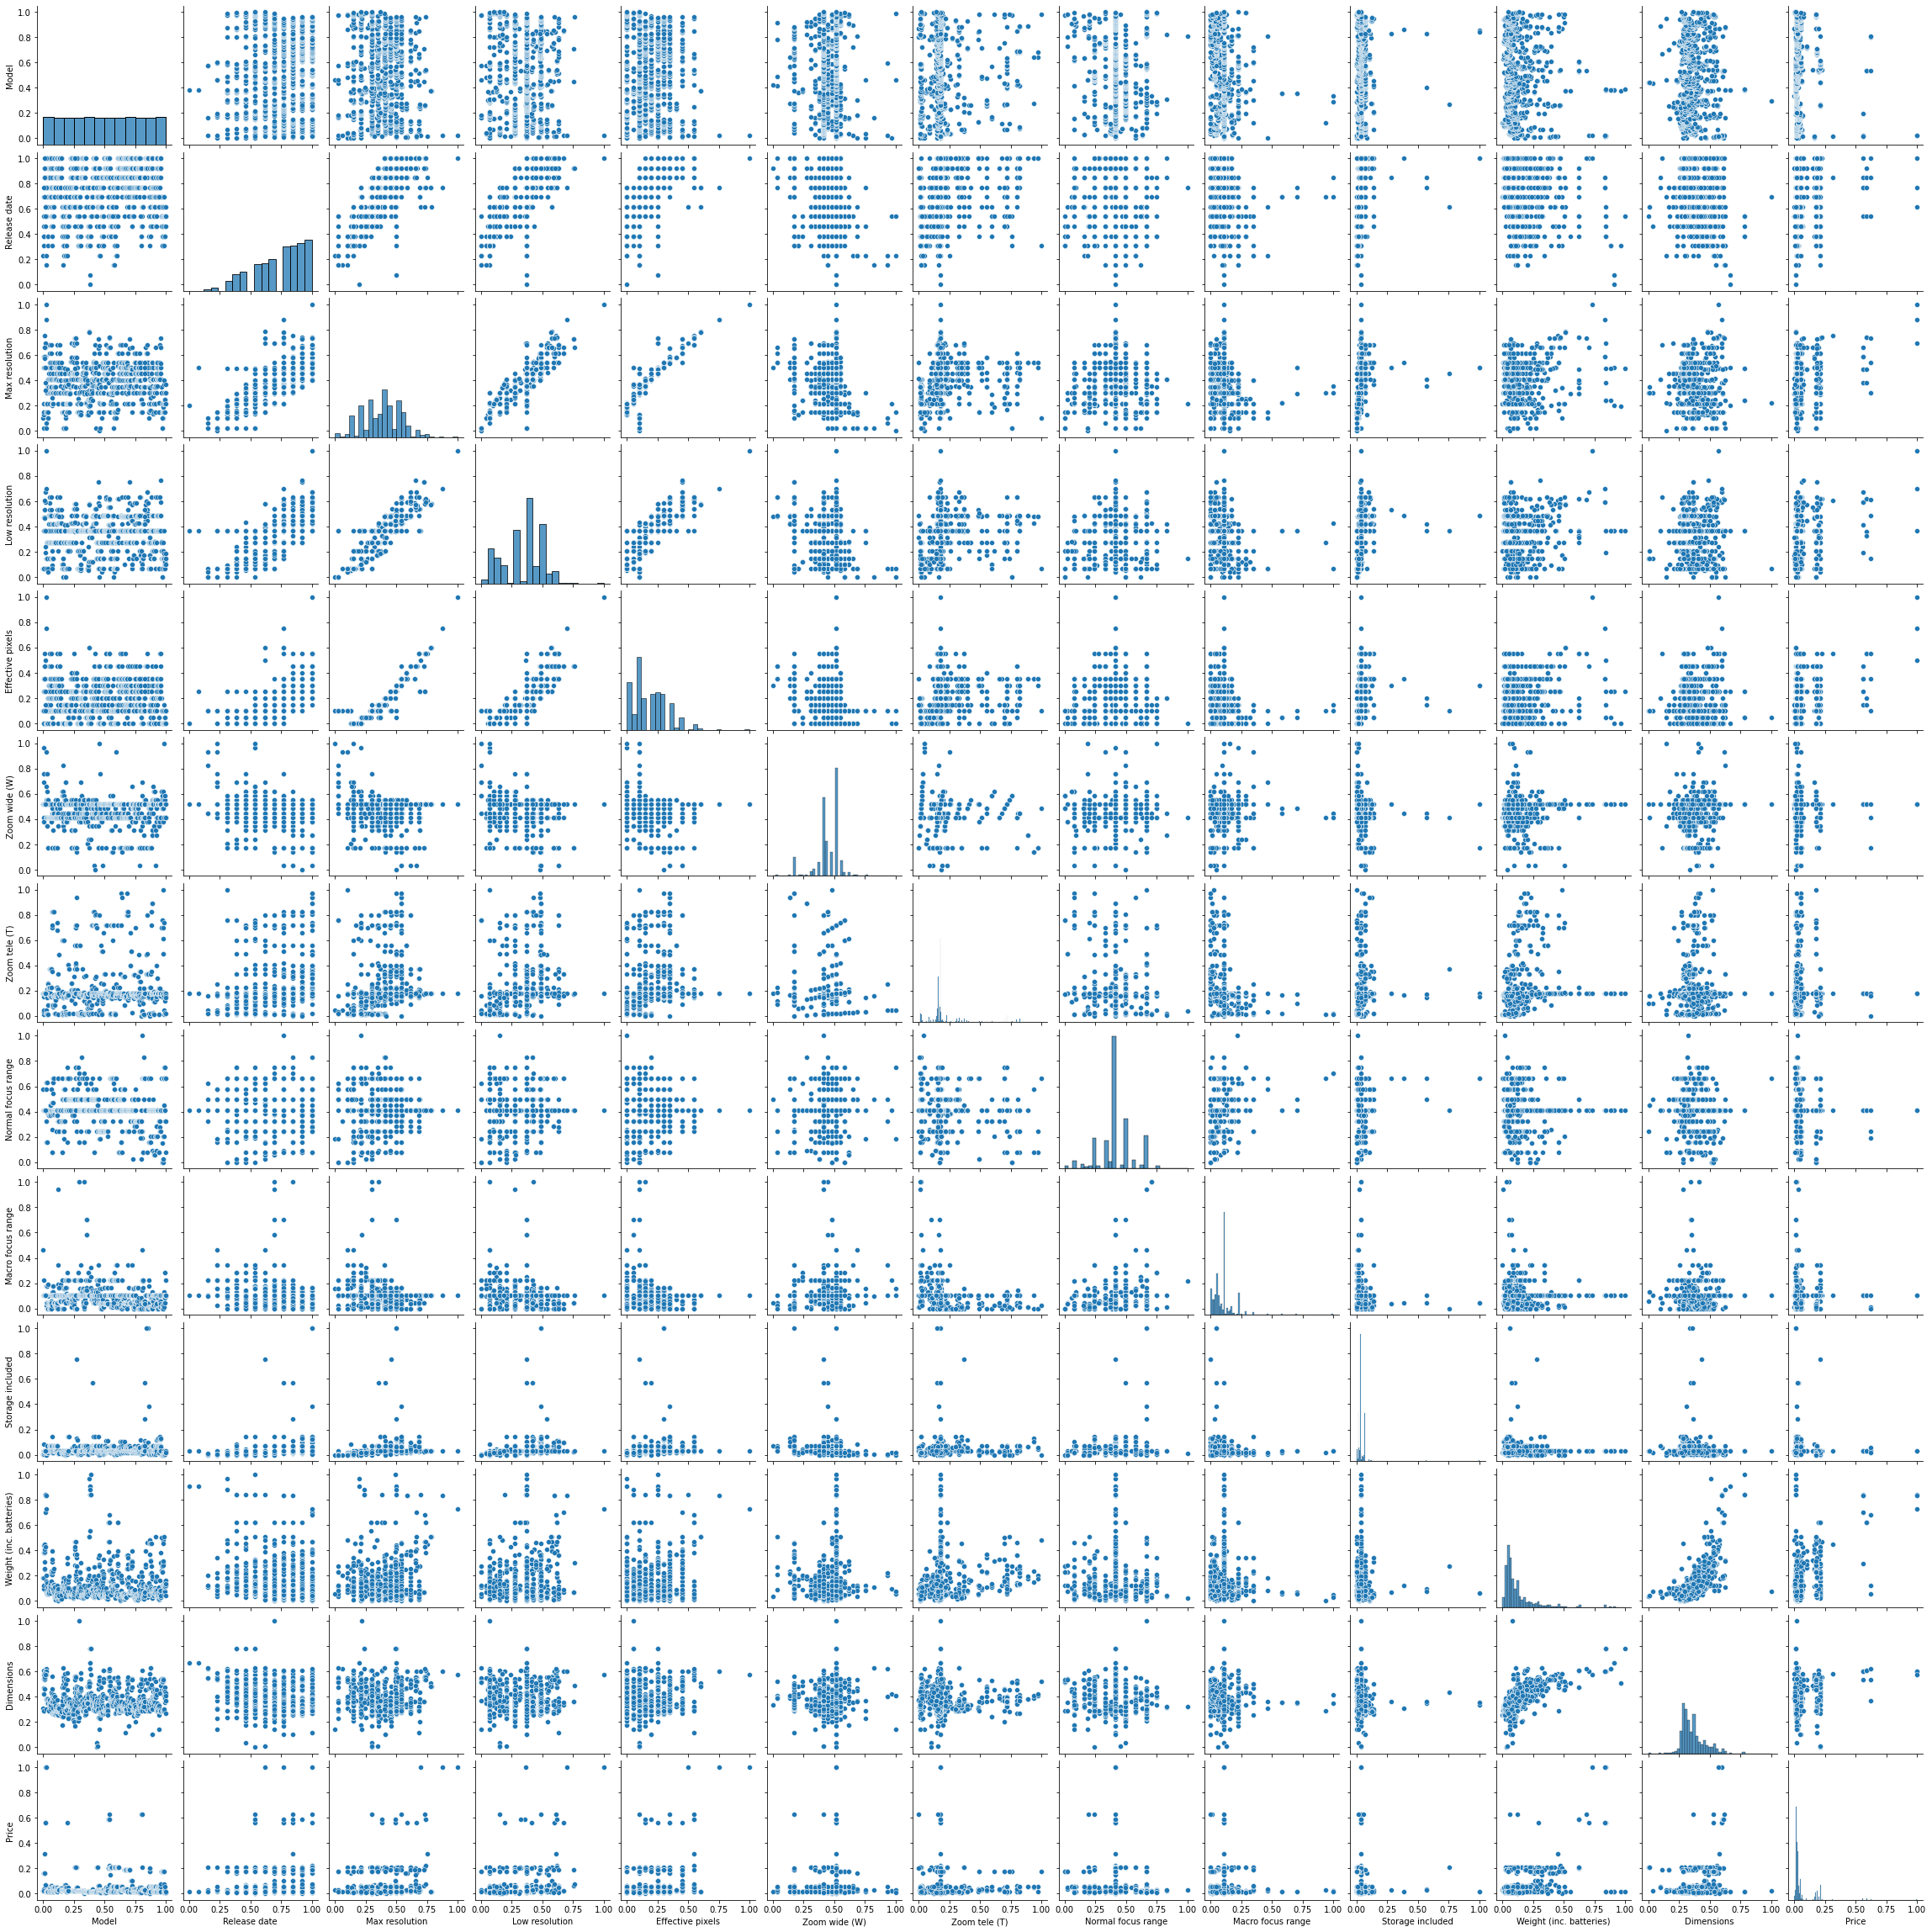

In [192]:
sns.pairplot(df)

## e

In [193]:
y=df['Price']
x=df.drop(columns="Price")
x

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions
0,0.000000,0.230769,0.100313,0.068493,0.1,0.517241,0.175510,0.579832,0.464286,0.006682,0.181818,0.309524
1,0.000966,0.307692,0.150470,0.068493,0.0,0.517241,0.175510,0.411765,0.107143,0.006682,0.181818,0.609524
2,0.001932,0.461538,0.025078,0.369863,0.1,0.758621,0.034694,0.411765,0.107143,0.002227,0.125000,0.285714
3,0.002899,0.384615,0.125392,0.068493,0.1,0.413793,0.014286,0.411765,0.107143,0.006682,0.125000,0.285714
4,0.003865,0.384615,0.125392,0.068493,0.1,0.689655,0.030612,0.411765,0.107143,0.086860,0.113636,0.466667
...,...,...,...,...,...,...,...,...,...,...,...,...
1033,0.996135,0.538462,0.300940,0.150685,0.1,0.517241,0.175510,0.075630,0.107143,0.015590,0.125000,0.428571
1034,0.997101,0.461538,0.300940,0.150685,0.1,0.413793,0.157143,0.663866,0.095238,0.033408,0.164773,0.409524
1035,0.998068,0.538462,0.300940,0.150685,0.1,0.413793,0.142857,0.663866,0.107143,0.015590,0.136364,0.366667
1036,0.999034,0.538462,0.369906,0.188356,0.1,0.413793,0.142857,0.663866,0.107143,0.033408,0.136364,0.366667


## f

In [194]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
x_train.head()

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions
538,0.517874,0.846154,0.451411,0.369863,0.25,0.517241,0.718367,0.243697,0.059524,0.026726,0.071023,0.390476
496,0.477295,0.846154,0.407524,0.369863,0.20,0.379310,0.151020,0.243697,0.035714,0.028953,0.045455,0.261905
684,0.658937,0.923077,0.539185,0.479452,0.35,0.413793,0.157143,0.495798,0.107143,0.060134,0.048295,0.319048
846,0.812560,0.615385,0.300940,0.150685,0.10,0.379310,0.151020,0.663866,0.226190,0.033408,0.125000,0.400000
759,0.731401,0.615385,0.300940,0.273973,0.10,0.517241,0.175510,0.025210,0.047619,0.033408,0.073864,0.352381


## g

In [195]:
reg = LinearRegression().fit(x_train, y_train)
reg.score(x_train, y_train)

0.32307485992491913

## h

In [198]:
reg.coef_

array([ 0.02261258,  0.02624456,  0.01989461, -0.11894273,  0.2088175 ,
        0.01800001, -0.0990688 , -0.04676805,  0.03658293, -0.03835925,
        0.39992484, -0.07035753])

In [197]:
reg.intercept_

0.02368702172959055